In [1]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Create a date range from 1st Jan 2020 to 31st Dec 2023
date_range = pd.date_range(start='2020-01-01', end='2023-12-31', freq='D')

# Simulate sales data (random values + seasonality effect)
sales = np.random.randint(50, 500, size=len(date_range)) + np.sin(np.linspace(0, 30, len(date_range))) * 100

# Create a DataFrame
dominos_sales_data = pd.DataFrame({
    'date': date_range,
    'sales': np.round(sales, 0)
})

# Save the DataFrame to a CSV file
dominos_sales_data.to_csv('dominos_sales_data.csv', index=False)

# Check the first few rows of the data
print(dominos_sales_data.head())


        date  sales
0 2020-01-01  152.0
1 2020-01-02  487.0
2 2020-01-03  402.0
3 2020-01-04  326.0
4 2020-01-05  164.0


In [2]:
# Load the dataset
dominos_sales_data = pd.read_csv('dominos_sales_data.csv')

# Convert 'date' column to datetime format
dominos_sales_data['date'] = pd.to_datetime(dominos_sales_data['date'])

# Set 'date' as the index
dominos_sales_data.set_index('date', inplace=True)

# Check for missing values
print(dominos_sales_data.isnull().sum())

# Handle missing values (if any), here we fill them with the mean
dominos_sales_data['sales'].fillna(dominos_sales_data['sales'].mean(), inplace=True)

# Add some additional features like 'day_of_week', 'month', etc.
dominos_sales_data['day_of_week'] = dominos_sales_data.index.dayofweek
dominos_sales_data['month'] = dominos_sales_data.index.month
dominos_sales_data['quarter'] = dominos_sales_data.index.quarter


sales    0
dtype: int64


C:\Users\KAVITHA HOME PC\AppData\Local\Temp\ipykernel_5792\3095205930.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dominos_sales_data['sales'].fillna(dominos_sales_data['sales'].mean(), inplace=True)


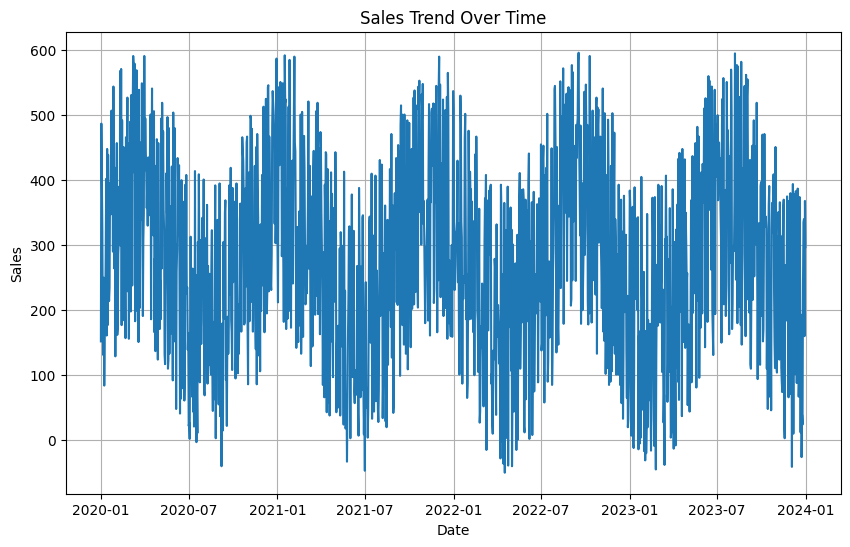

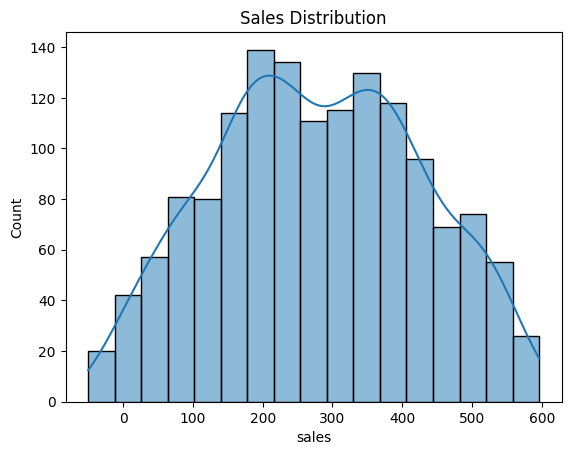

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales trend over time
plt.figure(figsize=(10,6))
plt.plot(dominos_sales_data['sales'])
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Distribution of sales data
sns.histplot(dominos_sales_data['sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

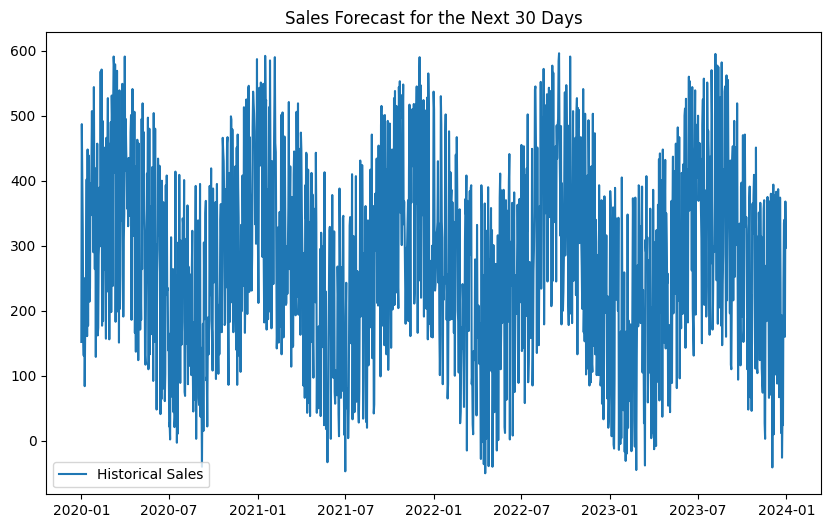

In [5]:
# Plot historical and forecasted sales
plt.figure(figsize=(10,6))
plt.plot(dominos_sales_data.index, dominos_sales_data['sales'], label='Historical Sales')
#plt.plot(pd.date_range(dominos_sales_data.index[-1], periods=31, freq='D')[1:], forecast, label='Forecast', color='red')
plt.title('Sales Forecast for the Next 30 Days')
plt.legend()
plt.show()


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features and target variable
features = ['day_of_week', 'month', 'quarter']
X = dominos_sales_data[features]
y = dominos_sales_data['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 22792.30563941994


In [7]:
import streamlit as st

# Streamlit Dashboard to display results
st.title("Dominos - Predictive Purchase Order System")

# Plot the sales trend
st.subheader('Sales Trend Over Time')
st.line_chart(dominos_sales_data['sales'])

# Display the forecast
st.subheader('Next 30 Days Sales Forecast')

# Show predictions from the Random Forest model
st.subheader('Random Forest Model Predictions')
st.write(f"Mean Squared Error: {mse}")

2024-11-23 05:10:20.223 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-23 05:10:21.160 
  command:

    streamlit run e:\vscode\.venv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-23 05:10:21.162 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-23 05:10:21.164 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-23 05:10:21.168 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-23 05:10:25.357 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-23 05:10:25.360 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-23 05:10:25.362 Thread 'MainThread': missing Scr